# Global map of SST anomalies, absolute and standardised

In [1]:
#inputs/outputs
clst = '1982' ; clen = '2011'
stdat = '2025-03' ; endat = '2025-07'

diri = '/g/data/gv90/wrh581/OISST/'
fili = 'OIv2_SST_1982-2025.nc'
var_name = 'sst'

diro = '/g/data/jk72/wrh581/plots/'
filo = 'OISST_anom_'+stdat+'-'+endat+'.png'


In [2]:
#set up: import packages 
import numpy as np
import xarray as xr
import pandas as pd
import cmocean as cm
import cartopy as ccrs
import matplotlib.pyplot as plt


#kill the flox warning!
import logging
logging.getLogger("flox").setLevel(logging.WARNING)

### read data

In [3]:
sst = xr.open_dataset(diri+fili).load()
sst

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 528, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-08-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB nan nan nan nan ... -1.8 -1.8 -1.8
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

### calc anoms

In [4]:
cldata = sst.sel(time=slice(clst,clen)).groupby('time.month')
clim = cldata.mean('time')  
sd  = cldata.std('time')

anom = sst.sel(time=slice(stdat,endat)).groupby('time.month').mean('time').compute()
anom = anom - clim
anom_norm = anom/sd

anom = anom[var_name].mean('month').compute()
anom_norm = anom_norm[var_name].mean('month').compute()

### plot

Text(0.5, 0.98, '2025-03 - 2025-07')

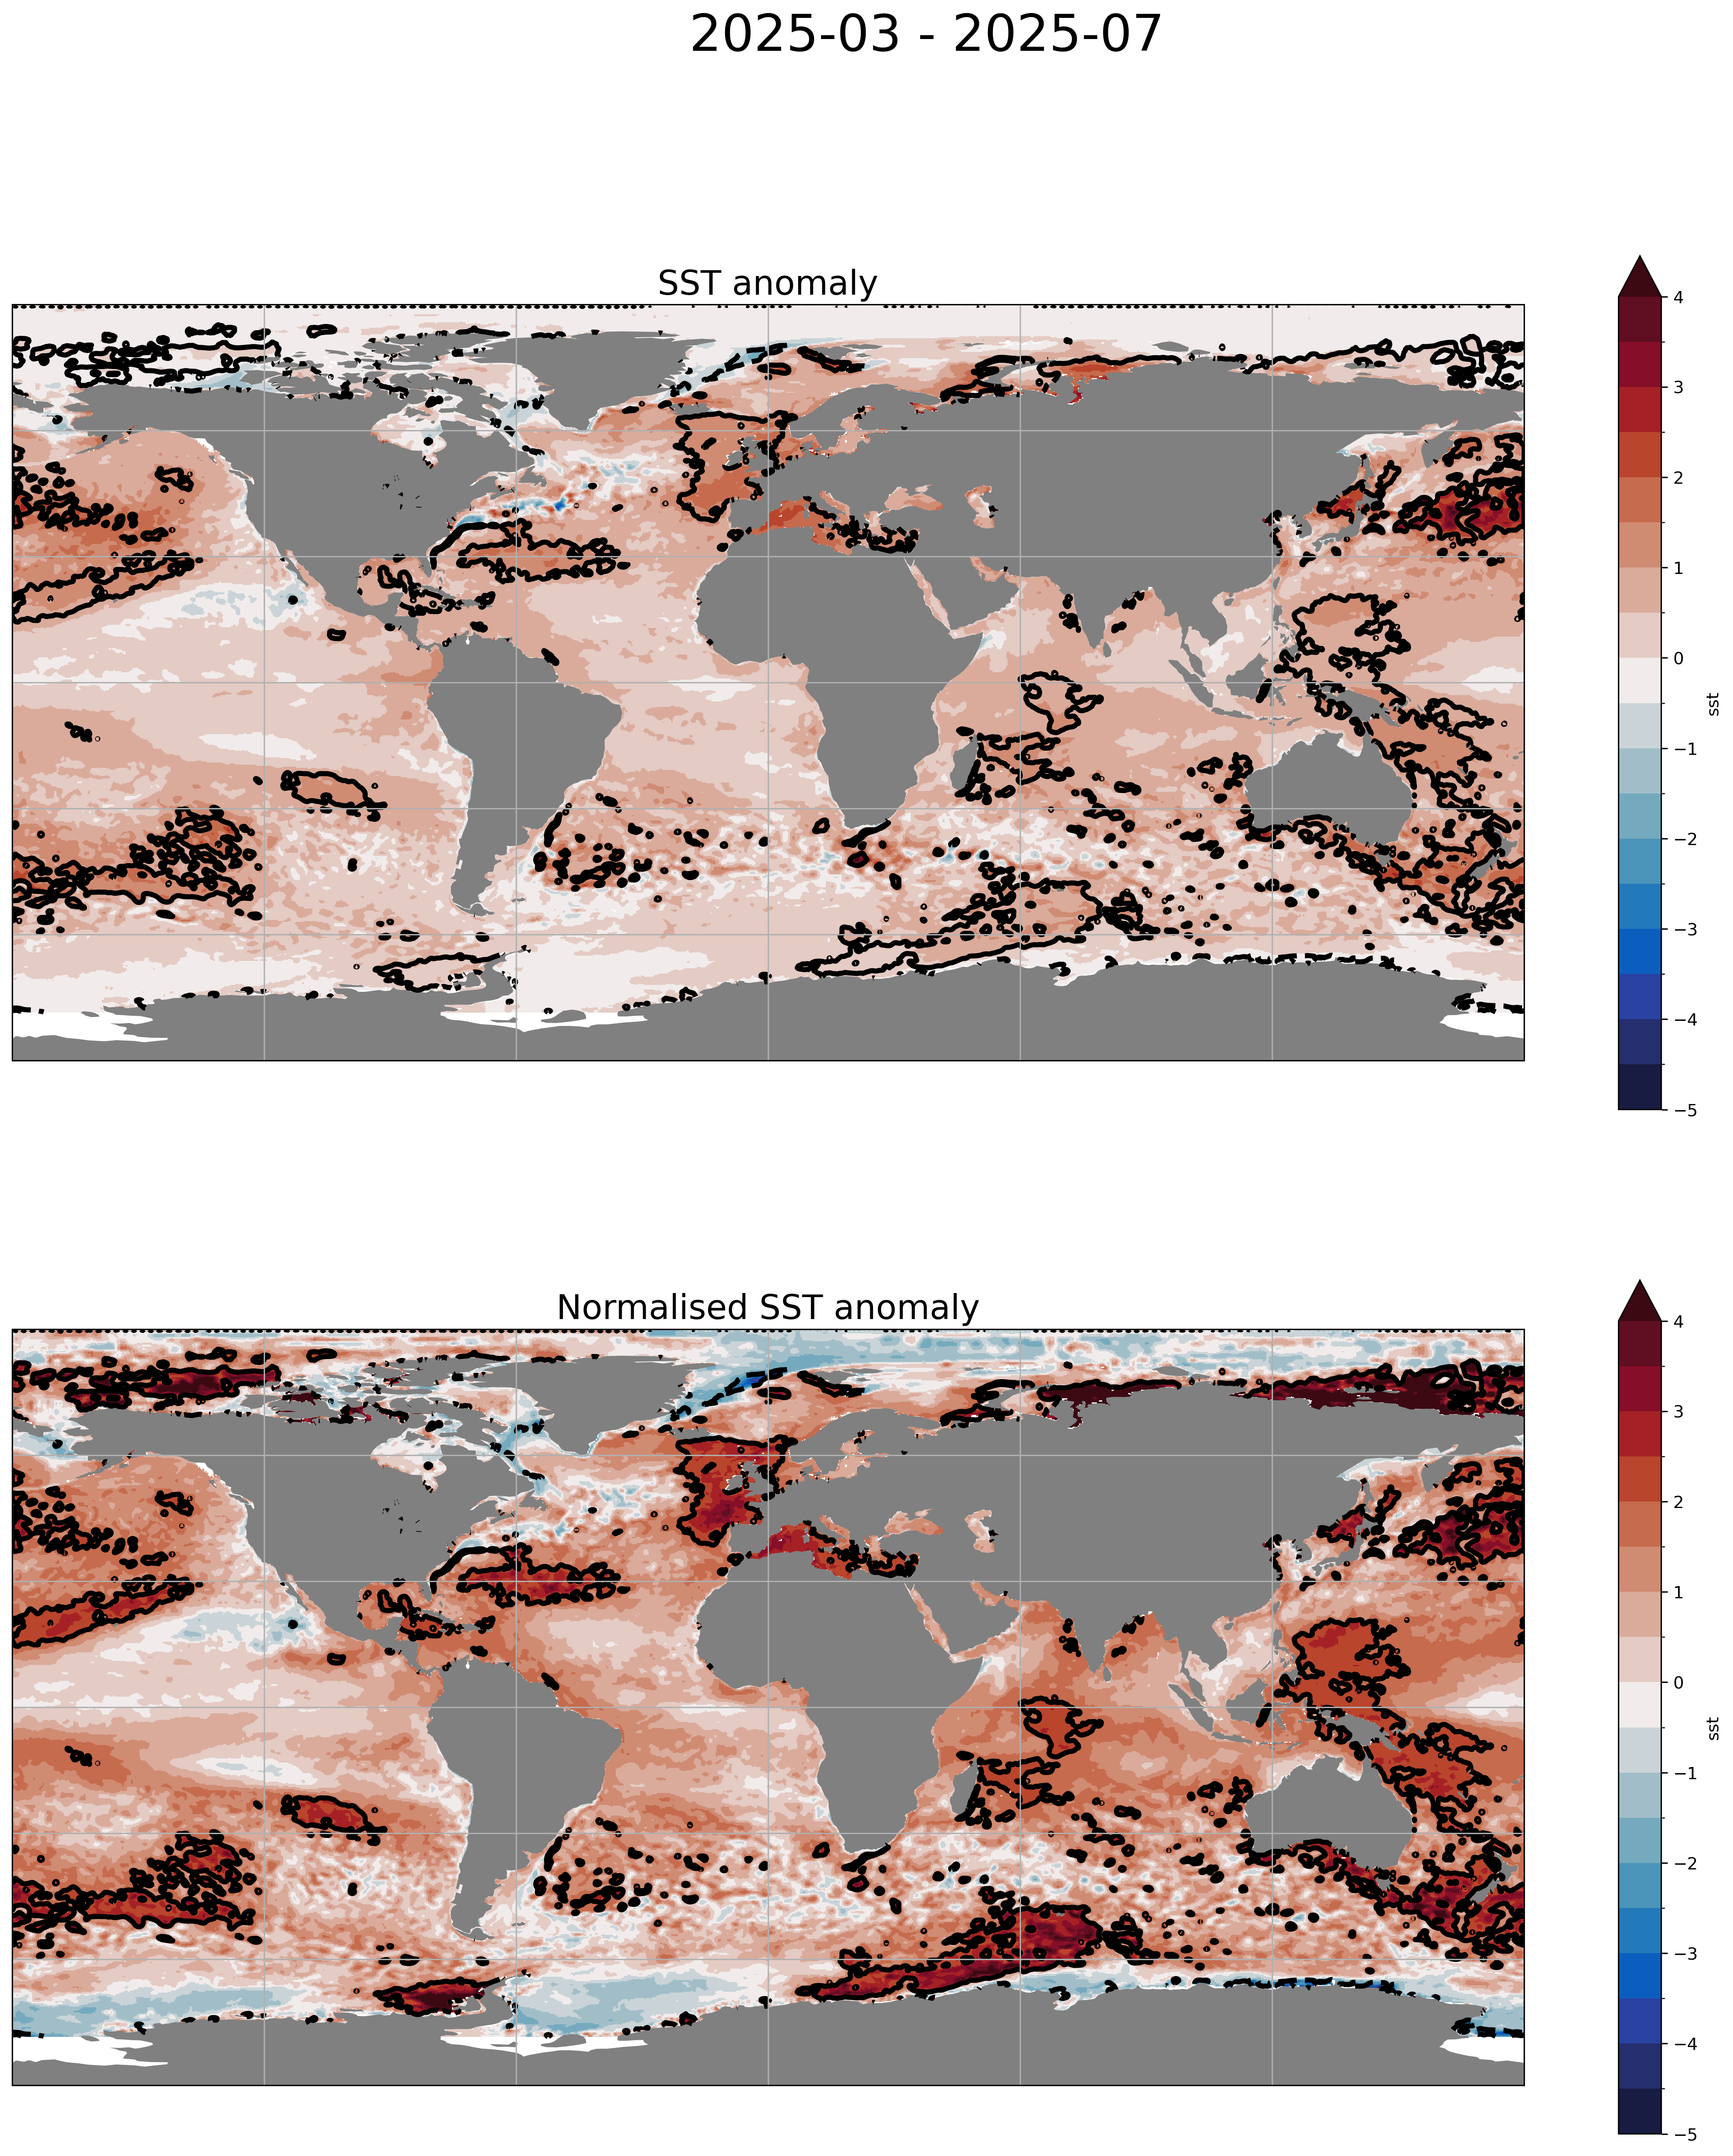

In [5]:
colmap = cm.cm.balance ; 
clev  = np.arange(-5., 4.5, 0.5)

plt.figure(figsize=(20,20), dpi=300)

def plot(pdata, panel, tString):

    mproj  = plt.subplot(2, 1, panel, projection=ccrs.crs.PlateCarree())
    mplot = pdata.plot.pcolormesh(ax=mproj, transform=ccrs.crs.PlateCarree(), cmap=colmap, levels = clev, add_colorbar=True)
    anom_norm.plot.contour(ax=mproj, transform=ccrs.crs.PlateCarree(),  colors='black', levels=[-2.,2.], linewidths=3.)
    mproj.add_feature(ccrs.feature.LAND, facecolor=[0.5,0.5,0.5], zorder=1) #color land using RGB coords
    mproj.gridlines(zorder=2) 
    mproj.set_title(tString,fontsize = 20)
    #plt.colorbar(ax=mproj,orientation='horizontal',extend='both')

plot(anom, 1, 'SST anomaly')
plot(anom_norm, 2, 'Normalised SST anomaly')



plt.suptitle(stdat+' - '+endat, fontsize=30)
#plt.savefig(diro+filo, bbox_inches='tight)